## <p style="text-align: right;"> &#9989; Nathan Kurt</p>

# CMSE 201 Make-up Midterm (Section 001 - Fall 2018)

The goal of this midterm is to give you the opportunity to test out some of the skills that you've developed thus far this semester. In particular, you'll model a sytem using ODEINT; load, manipulate, and plot data using NumPy and Matplotlib; and describe compartmental models and think about how to create one. You should find that you have all of the skills necessary to complete this exam with even just eight weeks of CMSE 201 under your belt!

You are encouraged to look through the entire exam before you get started so that you can appropriately budget your time and understand the broad goals of the exam. You might want to make sure you have access to any data you need and that you can get it loaded into your notebook sooner than later, in case you run into issues. Let your instructor know right away if you have problems with accessing the data.

The exam is set up so that even if you get stuck on one part there are opportunities to get points on the other parts, so consider jumping ahead if you feel like you aren't making progress and then come back later if you have time.

**Important note about using online resources**: This exam is "open internet". That means that you can look up documentation, google how to accomplish certain Python tasks, etc. Being able to effectively use the internet for computational modeling and data science is a very important skill, so we want to make sure you have the opportunity to exercise that skill. **However, the use of any person-to-person communication software is absolutely not acceptable.** If you are seen accessing your email, using a chat program (e.g. Slack), or any sort of collaborative cloud storage or document software (e.g. Google Documents), you will be at risk for receiving a zero on the exam. You are also expected to complete the exam **without** using old notebooks from class.

**Keep your eyes on your screen!** Unfortunately, there isn't enough space in the room for everyone to sit at their own table so please do your best to keep your eyes on your own screen. This exam is designed to give *you* the opportunity to show the instructor what you can do and you should hold yourself accountable for maintaining a high level of academic integrity. If any of the instructors observe suspicious behavior, you will, again, risk receiving a zero.

Finally, **Make sure that all of the cells run as expected before you submit your notebook to D2L!**

---
## Part 1: Modeling a system using ODEINT (35 points)

**Question 1 (15 points)**: In this question, you're going to think about how one could build a model to study how the biomass (https://en.wikipedia.org/wiki/Biomass_(ecology)) in a forest changes as a function of time. In particular, we'll be thinking about how biomass moves between living trees, dead trees, and humus, which is defined to be "the organic component of soil, formed by the decomposition of leaves and other plant material by soil microorganisms." We can model this system with the following equations:

$$ \frac{dx}{dt} = -x + 3y $$
$$ \frac{dy}{dt} = -3y + 5z $$
$$ \frac{dz}{dt} = -5z $$

where $x$ is the biomass that has decayed in humus, $y$ is the biomass in dead trees, and $z$ is the biomass in living trees. Given that we're talking about the life and death of trees, we assume will use **decades** (10s of years) as our unit of time, $t$.

Solve this biomass system using `odeint`. Assuming the following initial conditions:

* $x(0) = 0$
* $y(0) = 0$
* $z(0) = 809601$ in units of thousands of tons (based on 2012 data for forests in Michigan - [https://www.fs.fed.us/nrs/pubs/ru/ru_fs7.pdf]()).

Evolve the model for 5 decades (50 years) using a timestep of $\Delta t = 0.01$ decades.

In [57]:
# Put your code here
import numpy as np
from scipy.integrate import odeint
%matplotlib inline 
import matplotlib.pyplot as plt

def derivs(current, time):
    x0 = current[0]
    y0 = current[1]
    z0 = current[2]
    dxdt = -x0 + 3*y0
    dydt = -3*y0 + 5*z0
    dzdt = -5*z0
    
    return [dxdt, dydt, dzdt]
    

#initial conditions
x0 = 0
y0 = 0
z0 = 809601

time = np.linspace(0,5,501)
#time = np.arange(0,5, .01)
init = [x0,y0,z0]
sol = odeint(derivs, init, time)



**Question 2 (8 points)**: Now that you have a solution to the model, make a single plot that displays the evolution of all three variables, humus, dead trees, and living trees as a function time. Each line should be a different color and your plot should contain a $x$-axis label, a $y$-axis label, and a legend.

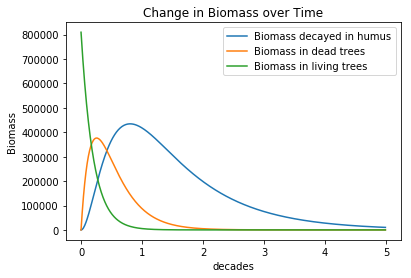

In [77]:
# Put your code here
first_two = np.arange(0,2,.01)
plt.plot(time,sol[:,0], label="Biomass decayed in humus")
plt.plot(time,sol[:,1], label="Biomass in dead trees")
plt.plot(time,sol[:,2], label="Biomass in living trees")
plt.xlabel("decades")
plt.ylabel("Biomass")
plt.title("Change in Biomass over Time")
plt.legend()
plt.show()


**Question 3 (6 points)**: Make a second plot where you zoom in on just the first two decades of the evolution of the system. Ensure that all of the same labels are included. **Note**: This should not involve re-running your model, but instead should involve plotting a subset of all of the values using NumPy array indexing.

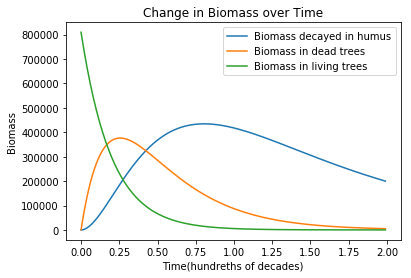

In [80]:
# Put your code here

plt.plot(time[:200],sol[:200,0], label="Biomass decayed in humus")
plt.plot(time[:200],sol[:200,1], label="Biomass in dead trees")
plt.plot(time[:200],sol[:200,2], label="Biomass in living trees")
plt.xlabel("Time(decades)")
plt.ylabel("Biomass")
plt.title("Change in Biomass over Time")
plt.legend()
plt.show()

**Question 4 (3 points)**: At what point in time is the total amount of living trees half of the starting value? Explain how you determined this. Feel free to include code, if you wish.

It looks like at about .14 decades, the amount of living trees hit half it's total value. I found the half point and then counted how long it took to get to it as i looped through the array

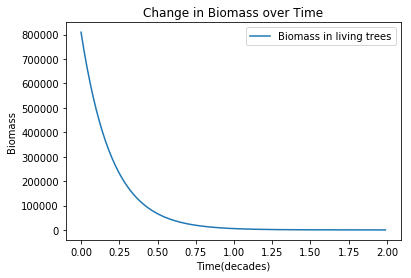

402035.9585813469
0.13999999999999999


In [92]:
#plt.plot(sol[:200,0], label="Biomass decayed in humus")
#plt.plot(sol[:200,1], label="Biomass in dead trees")
plt.plot(time[:200],sol[:200,2], label="Biomass in living trees")
plt.xlabel("Time(decades)")
plt.ylabel("Biomass")
plt.title("Change in Biomass over Time")
plt.legend()
plt.show()

mid_point = z0/2
count = 0
for i in sol[:,2]:
    if i < mid_point:
        print(i)
        break
    else:
        count +=.01
        
print(count)
        

        


**Question 5 (3 points)**: At what point in time does the total amount of biomass in the humus exceed that of the dead trees? Explain how you determined this. Feel free to include code, if you wish.

It looks like at about 4 years maybe 4.2 years. Because that's the intersection point and after that the biomass decayed in humus is higher

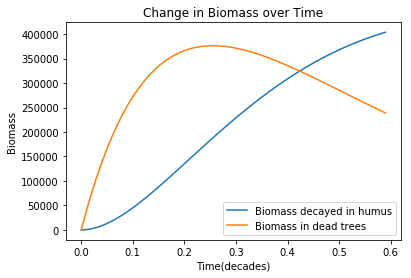

In [95]:
# Put any code you care to here
plt.plot(time[:60],sol[:60,0], label="Biomass decayed in humus")
plt.plot(time[:60],sol[:60,1], label="Biomass in dead trees")
#plt.plot(sol[40:60,2], label="Biomass in living trees")
plt.xlabel("Time(decades)")
plt.ylabel("Biomass")
plt.title("Change in Biomass over Time")
plt.legend()
plt.show()

---
## Part 2: Load, manipulate, and visualize data using NumPy and Matplotlib (35 points)

In this part of the exam you're going to analyze a dataset that was used in the following article:

["Dear Mona, Which State has the Worst Drivers?"](https://fivethirtyeight.com/features/which-state-has-the-worst-drivers/)

**What will your conclusion be?**

The dataset was downloaded from [here](https://github.com/fivethirtyeight/data/tree/master/bad-drivers) and if you were to review that page you can see what the column headers are. They are as follows:

* Column 1: State
* Column 2: Number of drivers involved in fatal collisions per billion miles
* Column 3: Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding
* Column 4: Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired
* Column 5: Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted
* Column 6: Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents
* Column 7: Car Insurance Premiums (\$)
* Column 8: Losses incurred by insurance companies for collisions per insured driver (\$)

**Question 6 (8 points)**: Read in just the first column from the dataset so that you can store the names of the States in an array that is separate from the rest of the data. Use `np.loadtxt()` to do this and make sure you skip the first row to avoid the header information. The columns in the dataset are separated by `","`. Since these are strings, you need to tell NumPy to load them in as "str" values.

**Print your array of states after you've loaded them in**.

In [152]:
# Put your code here

states = np.loadtxt("bad-drivers.csv",dtype=str,delimiter=",",skiprows=1,usecols=0)
print(states)

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


**Question 7 (8 points)**: Read in columns 1 through 6 using `np.loadtxt()`. Again, you need to make sure you skip the header row. Make sure you unpack the values so that you can store each column with an appropriately named variable. Make sure you read them in as floats and not strings!

**Print out the values from the "Number of drivers involved in fatal collisions per billion miles"**.

In [121]:
# Put your code here
#states = np.loadtxt("bad-drivers.csv",dtype=str,delimiter=",",skiprows=1,usecols=0)
fatal_collisions_info = np.loadtxt("bad-drivers.csv",dtype=float,delimiter=",",skiprows=1,usecols=(1,2,3,4,5))
print(fatal_collisions_info[:,0])

[18.8 18.1 18.6 22.4 12.  13.6 10.8 16.2  5.9 17.9 15.6 17.5 15.3 12.8
 14.5 15.7 17.8 21.4 20.5 15.1 12.5  8.2 14.1  9.6 17.6 16.1 21.4 14.9
 14.7 11.6 11.2 18.4 12.3 16.8 23.9 14.1 19.9 12.8 18.2 11.1 23.9 19.4
 19.5 19.4 11.3 13.6 12.7 10.6 23.8 13.8 17.4]


**Question 8 (4 points)**: Print the total number of drivers involved in fatal collisions per billion miles summed across all of the states.

In [126]:
# Put your code here
print(sum(fatal_collisions_info[:,0]))

805.2999999999998


**Question 9 (4 points)**: Print the mean and standard deviation of the percentage of people who were speeding and the percentage of people who were alcohol-impaired. Make sure to include some text to indicate what the numbers correspond to.

In [133]:
# Put your code here
print("Mean of percentage speeding: ", np.mean(fatal_collisions_info[:,1]))
print("Mean of percentage alcohol impaired: ", np.mean(fatal_collisions_info[:,2]))
print("Std Deviation of percentage Speeding: ", np.std(fatal_collisions_info[:,1]))
print("Std Deviation of Percentage of  Alcohol Impaired: ", np.std(fatal_collisions_info[:,2]))





Mean of percentage speeding:  31.725490196078432
Mean of percentage alcohol impaired:  30.686274509803923
Std Deviation of percentage Speeding:  9.538525457163843
Std Deviation of Percentage of  Alcohol Impaired:  5.081647857167222


**Question 10 (4 points)**: Print out all of the percentages where the people who were not distracted is less than 50% and then **use a mask** to print out which states these correspond too.

In [164]:
# Put your code here
import numpy.ma as ma
print(len(fatal_collisions_info[:,3]))
fatal_collisions_info.sort[:,3]
mask = (states == "Alabama") 


51


NameError: name 'sort' is not defined

**Question 11 (4 points)**: Make a scatter plot of the percentage of people who were speeding versus the percentage of people who had not previously been involved in an accident. Choose any marker shape and color as along as they aren't the default value! Make sure to label the $x$-axis and the $y$-axis.

Text(0.5,1,"Speeding vs People who hadn't been in an accident before")

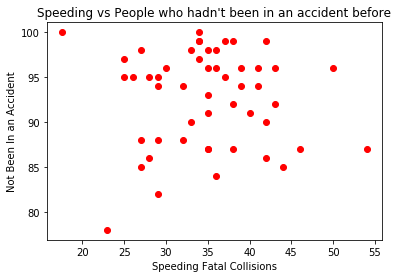

In [174]:
# Put your code here
plt.scatter(fatal_collisions_info[:,2],fatal_collisions_info[:,4],marker="o",c="red")
plt.xlabel("Speeding Fatal Collisions")
plt.ylabel("Not Been In an Accident")
plt.title("Speeding vs People who hadn't been in an accident before")

**Question 12 (3 points)**: In looking at your above scatter plot, would you argue that these two quantities are correlated or not correlated? Explain your reasoning.

No it doesn't look like there is much of a correlation because the dots are pretty spread out which suggests that they aren't that related


---
## Part 3: Describe what a compartmental model is and come up with a plan for building one (30 points)

**Question 13 (8 points)**: Explain, **in your own words**, what a compartmental model is.

It's a way to break up complicated problems into something more digestable, You can focus on solving each compartment individually and then show the relationship between compartments 


**Question 14 (6 points)**: Give **two** examples of systems or problems that can be modeled using compartmental models and describe what the compartments are.

Infectious diseases and how they spread can be a compartmental model also Compartments could looks something like: 
    * Animals
    * Carriers
    * Healthy people
    * Infected People
    * And dead people
 And all of these things would go based on the rates there

And you could turn the Spreading of Rumors into a compartmental model also
This one would probably have compartments like 
    * People who have heard the rumor
    * People who haven't heard the rumor
    * People who spread the rumor
    * People who don't care and don't spread the rumor

**Question 15 (16 points)**: As you might have heard in the news lately, people are discovering that various water sources in Michigan have been contaminated with high levels of PFAS chemicals ([https://www.mlive.com/news/index.ssf/page/michigans_water_crisis_pfas.html](https://www.mlive.com/news/index.ssf/page/michigans_water_crisis_pfas.html)). Much of these chemicals are introduced by manufacturing companies improperly disposing of the by-products of the manufacturing process. 

If I consider the network of water sources in the state of Michigan (i.e. ponds, lakes, rivers, ground water), I can be begin to understand how the introduction of a chemical into one location could lead an eventual contamination of the entire system -- eventually even our wonderful Lake Michigan could be impacted!

Your job is to **formulate a compartmental model** that identifies the compartments that contain the dangerous chemical pollutants, how the pollutants enter and/or leave the system, how the pollutants move between compartments, and any other additional complexities you wish to include.

You should make sure you:

* Identify the compartments
* Define the interactions between the compartments
* List the parameters (rate coefficients) that control how the compartments interact.
* Write down the corresponding system of equations that can be used to simulate the compartmental model, to the best of your ability.

*Write your response in this markdown cell*
* Compartments could be something like 
    * Uninfected Water Source
    * Infected Water Source
    * Infected Fish
    * Unifected Fish
 And as the infected fish goes up, the unifected water source will go down
 and as more fish become infected, there becomes a higher rate that it will go to water sites where that also gets infected. 
 
   
    
* Parameters 
    * Spread Rate
    * Infected Rate
    * water_infect_rate
* Equations: 
    * Water_infected_rate_over_time = infected_fish * spread_rate + uninfected_fish * infected_rate + Uninfected_water * water_infect_rate

---
## You're done! Congrats on finishing your CMSE 201 Midterm!

Upload a copy of this notebook to the submission folder on D2L and make sure your name is on it! **Make sure that all of your code cells execute correctly so that the instructor can properly grade the exam!**